In [1]:
import random
import pandas as pd
import numpy as np
import os

# 사이킷런에서 랜덤포레스트 모델 불러오기
from sklearn.ensemble import RandomForestRegressor

# 경고 메세지 무시하기
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
train = pd.read_csv('train.csv',encoding='cp949')
test = pd.read_csv('test.csv',encoding='cp949')

In [3]:
# 컬럼명 변환을 위한 리스트 할당
train_col = ['num', 'date_time', 'power', 'temp', 'wind', 'hum', 'rain', 'sun', 'cooler', 'solar']
test_col = ['num', 'date_time', 'temp', 'wind', 'hum', 'rain', 'sun', 'cooler', 'solar']
train.columns=train_col
test.columns=test_col

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

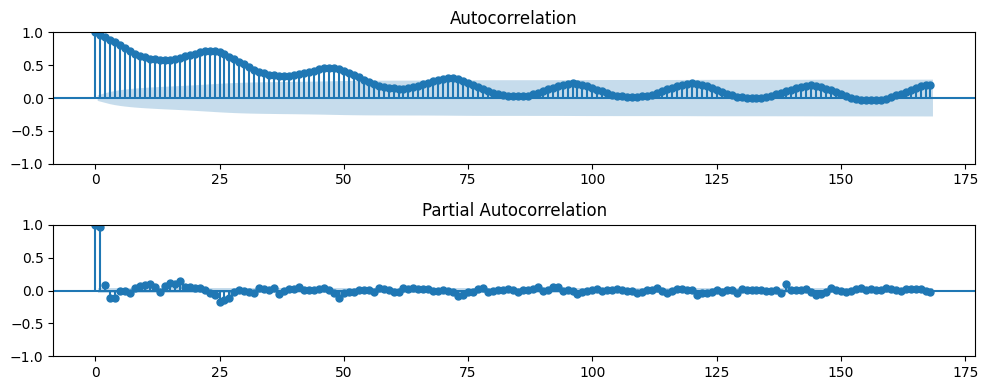

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(10,4))

ax1=fig.add_subplot(211)
plot_acf(train[train['num']==1]['power'],lags=168,ax=ax1)

ax2=fig.add_subplot(212)
plot_pacf(train[train['num']==1]['power'],lags=168,ax=ax2)

plt.tight_layout()

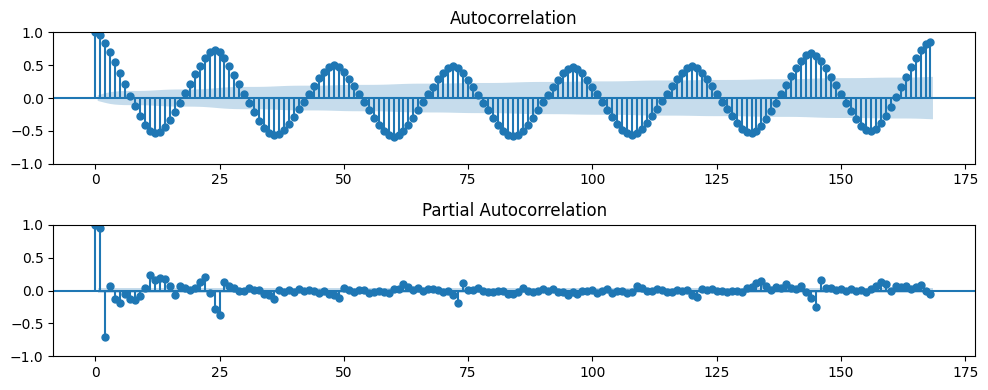

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(10,4))

ax1=fig.add_subplot(211)
plot_acf(train[train['num']==2]['power'],lags=168,ax=ax1)

ax2=fig.add_subplot(212)
plot_pacf(train[train['num']==2]['power'],lags=168,ax=ax2)

plt.tight_layout()

In [25]:
# 무작위로 생성된 시계열 데이터 생성
np.random.seed(0)
date_rng = pd.date_range(start='2023-01-01', end='2024-12-31', freq='W')
data = np.random.randn(len(date_rng))  # 무작위 데이터 생성
ts = pd.Series(data, index=date_rng)

# 데이터를 DataFrame으로 변환
df = pd.DataFrame({'value': ts})

In [26]:

df

,value
2023-01-01,1.764052
2023-01-08,0.400157
2023-01-15,0.978738
2023-01-22,2.240893
2023-01-29,1.867558
...,...
2024-12-01,1.883151
2024-12-08,-1.347759
2024-12-15,-1.270485
2024-12-22,0.969397


In [27]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid

Trend:
 date
2023-01-01   NaN
2023-01-08   NaN
2023-01-15   NaN
2023-01-22   NaN
2023-01-29   NaN
              ..
2024-12-01   NaN
2024-12-08   NaN
2024-12-15   NaN
2024-12-22   NaN
2024-12-29   NaN
Freq: W-SUN, Name: trend, Length: 105, dtype: float64
Seasonal:
 date
2023-01-01   -0.168651
2023-01-08   -0.837382
2023-01-15    0.338669
2023-01-22    0.826592
2023-01-29    0.467256
                ...   
2024-12-01   -1.322078
2024-12-08    0.082971
2024-12-15   -0.570109
2024-12-22    0.734039
2024-12-29   -0.168651
Freq: W-SUN, Name: seasonal, Length: 105, dtype: float64
Residual:
 date
2023-01-01   NaN
2023-01-08   NaN
2023-01-15   NaN
2023-01-22   NaN
2023-01-29   NaN
              ..
2024-12-01   NaN
2024-12-08   NaN
2024-12-15   NaN
2024-12-22   NaN
2024-12-29   NaN
Freq: W-SUN, Name: resid, Length: 105, dtype: float64


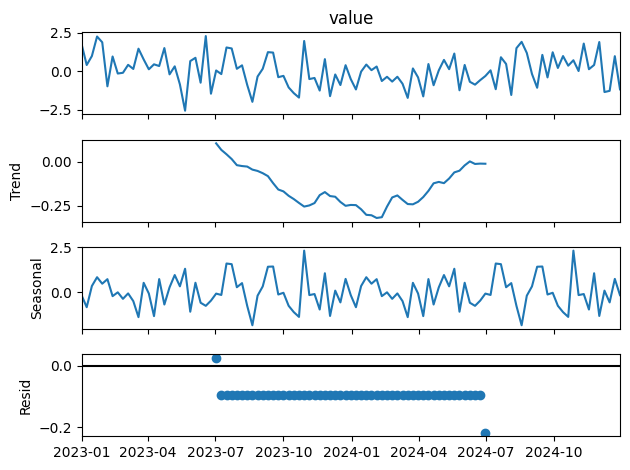

In [28]:
# 추세, 계절성, 잔차를 출력
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()


In [7]:
# AR 모델 파라미터 설정
phi = 0.7  # 자기회귀 계수

# 시계열 데이터 생성
np.random.seed(0)
n = 100  # 데이터 포인트 수
error = np.random.normal(0, 1, n)  # 랜덤 에러 항
data = np.zeros(n)

for t in range(1, n):
    data[t] = phi * data[t-1] + error[t]

# 데이터를 DataFrame으로 변환
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='D')
df = pd.DataFrame({'value': data}, index=date_rng)


In [10]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid


Trend:
 date
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04    1.849417
2023-01-05    2.052992
                ...   
2023-04-06    1.815362
2023-04-07    1.894303
2023-04-08         NaN
2023-04-09         NaN
2023-04-10         NaN
Freq: D, Name: trend, Length: 100, dtype: float64
Seasonal:
 date
2023-01-01   -0.368460
2023-01-02    0.335353
2023-01-03    0.621831
2023-01-04    0.296623
2023-01-05    0.113698
                ...   
2023-04-06    0.113698
2023-04-07   -0.229511
2023-04-08   -0.769535
2023-04-09   -0.368460
2023-04-10    0.335353
Freq: D, Name: seasonal, Length: 100, dtype: float64
Residual:
 date
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04    0.976047
2023-01-05    1.886329
                ...   
2023-04-06   -0.060381
2023-04-07   -0.346217
2023-04-08         NaN
2023-04-09         NaN
2023-04-10         NaN
Freq: D, Name: resid, Length: 100, dtype: float64


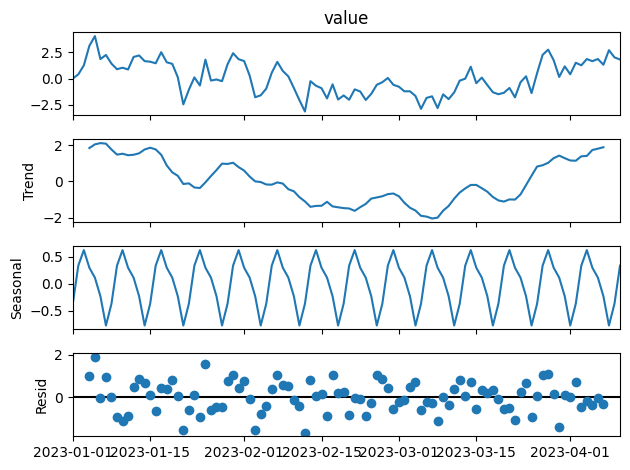

In [31]:
# 추세, 계절성, 잔차를 출력
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()


<Axes: >

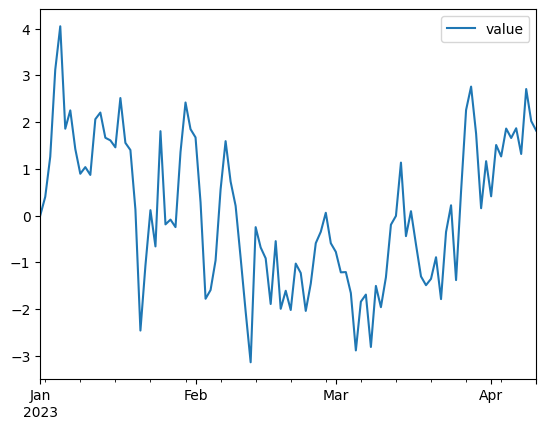

In [9]:
df.plot()

In [ ]:
# 주기가 일정한 데이터

In [11]:
# 시계열 데이터 생성
np.random.seed(0)
n = 36  # 데이터 포인트 수 (3년치 데이터, 매월 데이터)
seasonal_period = 12  # 계절성 주기 (12개월)

# 계절성 구성 요소 생성 (매월 데이터)
seasonal_component = np.sin(2 * np.pi * np.arange(n) / seasonal_period)

# 랜덤 에러 항
error = np.random.normal(0, 1, n)

# 시계열 데이터 = 계절성 + 에러
data = seasonal_component + error

# 데이터를 DataFrame으로 변환
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='M')
df = pd.DataFrame({'value': data}, index=date_rng)


<Axes: >

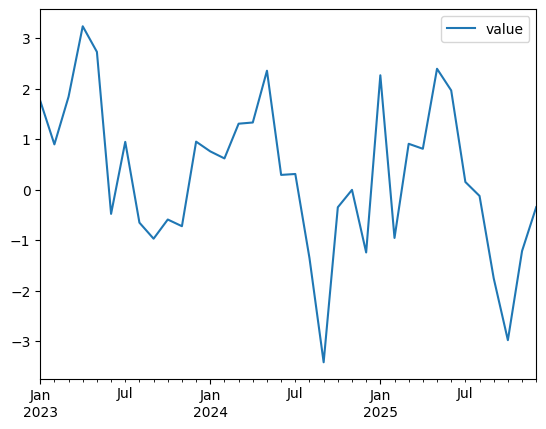

In [14]:
df.plot()

In [33]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid


Trend:
 date
2023-01-31         NaN
2023-02-28         NaN
2023-03-31         NaN
2023-04-30         NaN
2023-05-31         NaN
2023-06-30         NaN
2023-07-31    0.706420
2023-08-31    0.653024
2023-09-30    0.619135
2023-10-31    0.517381
2023-11-30    0.422352
2023-12-31    0.438962
2024-01-31    0.444591
2024-02-29    0.388767
2024-03-31    0.257413
2024-04-30    0.165465
2024-05-31    0.205607
2024-06-30    0.144105
2024-07-31    0.115450
2024-08-31    0.112645
2024-09-30    0.030389
2024-10-31   -0.007901
2024-11-30   -0.027991
2024-12-31    0.043393
2025-01-31    0.106576
2025-02-28    0.151332
2025-03-31    0.272059
2025-04-30    0.231676
2025-05-31    0.071394
2025-06-30    0.058317
2025-07-31         NaN
2025-08-31         NaN
2025-09-30         NaN
2025-10-31         NaN
2025-11-30         NaN
2025-12-31         NaN
Freq: M, Name: trend, dtype: float64
Seasonal:
 date
2023-01-31    1.202687
2023-02-28   -0.473520
2023-03-31    0.808975
2023-04-30    0.837549
2023-05-31    

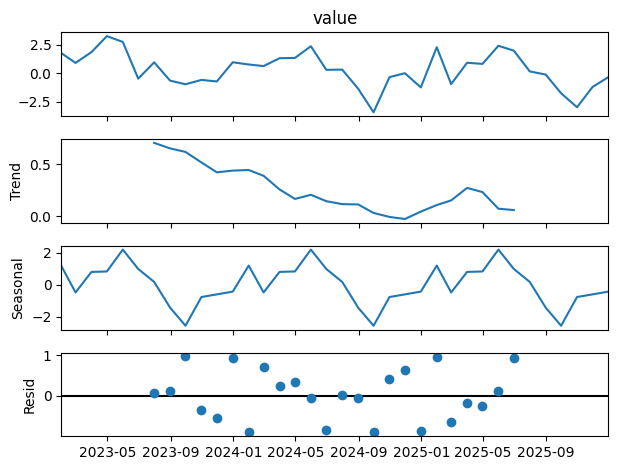

In [34]:
# 추세, 계절성, 잔차를 출력
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()


In [ ]:
# 선형적 트렌드

In [15]:
# 선형적 트렌드를 가진 시계열 데이터 생성
np.random.seed(0)
n = 100  # 데이터 포인트 수
t = np.arange(n)  # 시간 변수
linear_trend = 0.5 * t  # 선형 트렌드
error = np.random.normal(0, 1, n)  # 랜덤 에러 항

# 시계열 데이터 = 선형 트렌드 + 에러
data = linear_trend + error

# 데이터를 DataFrame으로 변환
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='D')
df = pd.DataFrame({'value': data}, index=date_rng)


<Axes: >

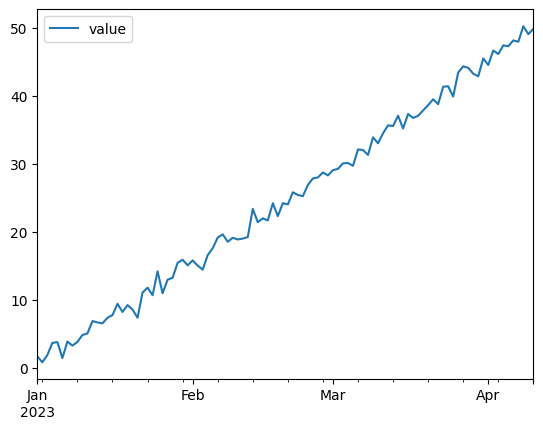

In [16]:
df.plot()

In [17]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid


Trend:
 date
2023-01-01          NaN
2023-01-02          NaN
2023-01-03          NaN
2023-01-04     2.532030
2023-01-05     2.758400
                ...    
2023-04-06    48.095877
2023-04-07    48.623550
2023-04-08          NaN
2023-04-09          NaN
2023-04-10          NaN
Freq: D, Name: trend, Length: 100, dtype: float64
Seasonal:
 date
2023-01-01    0.169095
2023-01-02    0.592155
2023-01-03    0.385964
2023-01-04   -0.112572
2023-01-05   -0.095058
                ...   
2023-04-06   -0.095058
2023-04-07   -0.310220
2023-04-08   -0.629364
2023-04-09    0.169095
2023-04-10    0.592155
Freq: D, Name: seasonal, Length: 100, dtype: float64
Residual:
 date
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04    1.321435
2023-01-05    1.204216
                ...   
2023-04-06    0.205755
2023-04-07   -0.302831
2023-04-08         NaN
2023-04-09         NaN
2023-04-10         NaN
Freq: D, Name: resid, Length: 100, dtype: float64


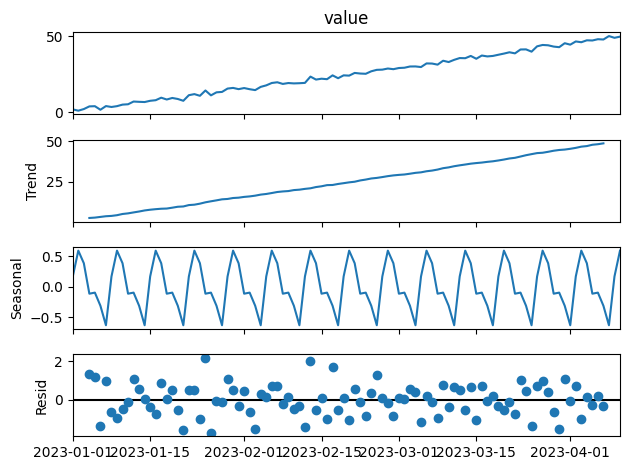

In [37]:
# 추세, 계절성, 잔차를 출력
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()


<Axes: >

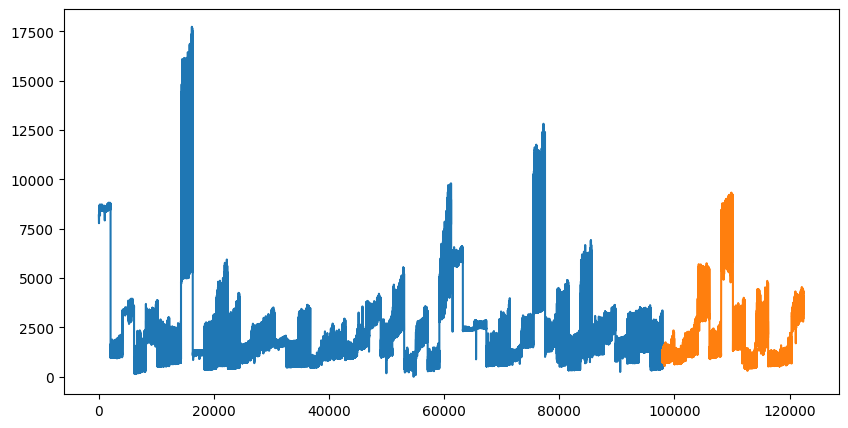

In [4]:
import matplotlib.pyplot as plt
#train=train.set_index('date_time')
plt.figure(figsize = (10,5))
y_train = train['power'][:int(0.8*len(train))]
y_test = train['power'][int(0.8*len(train)):]
y_train.plot()
y_test.plot()

<Figure size 640x480 with 0 Axes>

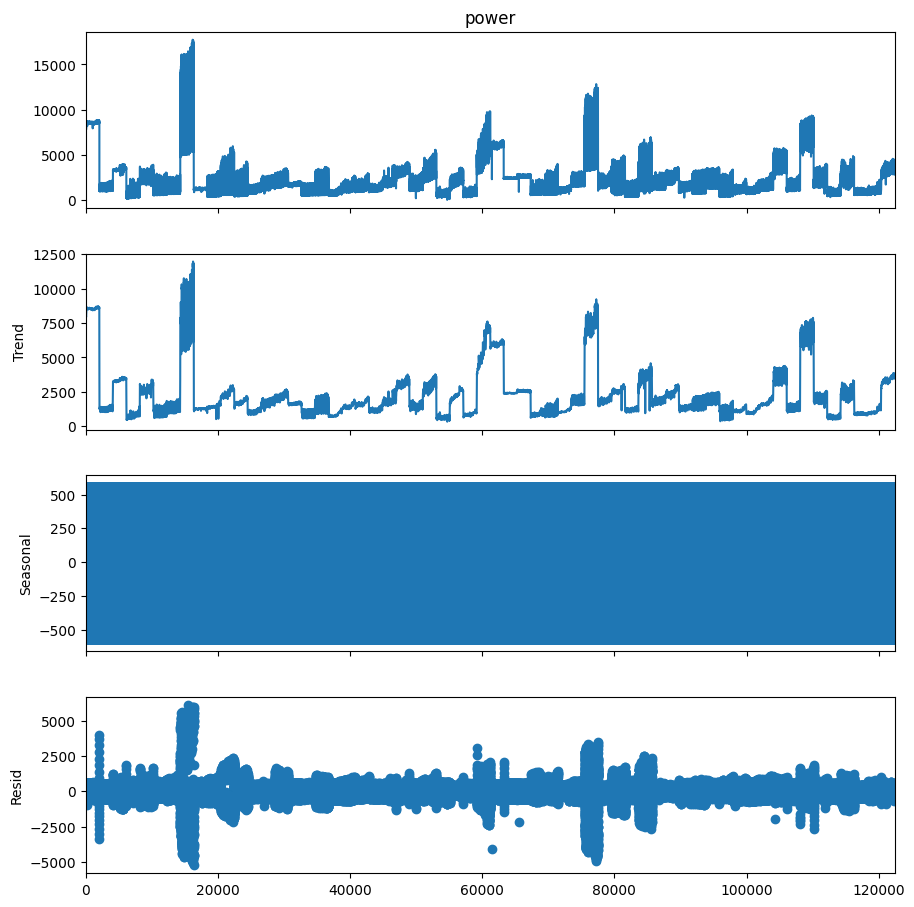

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train['power'], 
                            model = 'additive', 
                            period = 24)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)

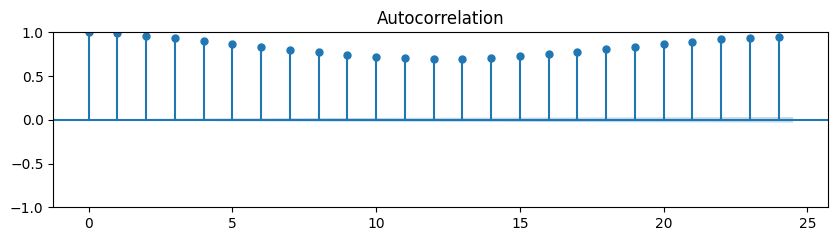

In [6]:
import statsmodels.api as sm

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['power'], lags = 24, ax = ax1)

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['power'])
print('ADF Stats : %f' % result[0])
print('P val : %f' % result[1])
print('Critical Values : ')

for i, v in result[4].items():
    print(i,v)

ADF Stats : -6.759891
P val : 0.000000
Critical Values : 
1% -3.4304034582207388
5% -2.8615636277435628
10% -2.5667825762128285


In [10]:
import pmdarima as pm

stepwise_model = pm.auto_arima(y_train,
                               d = 0,
                               start_p = 0, 
                               start_q = 0,
                               max_p = 7, 
                               max_q = 7,
                               seasonal=False,
                               suppress_warnings=True, 
                               stepwise=False)
stepwise_model.fit(y_train)

ARIMA(order=(1, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

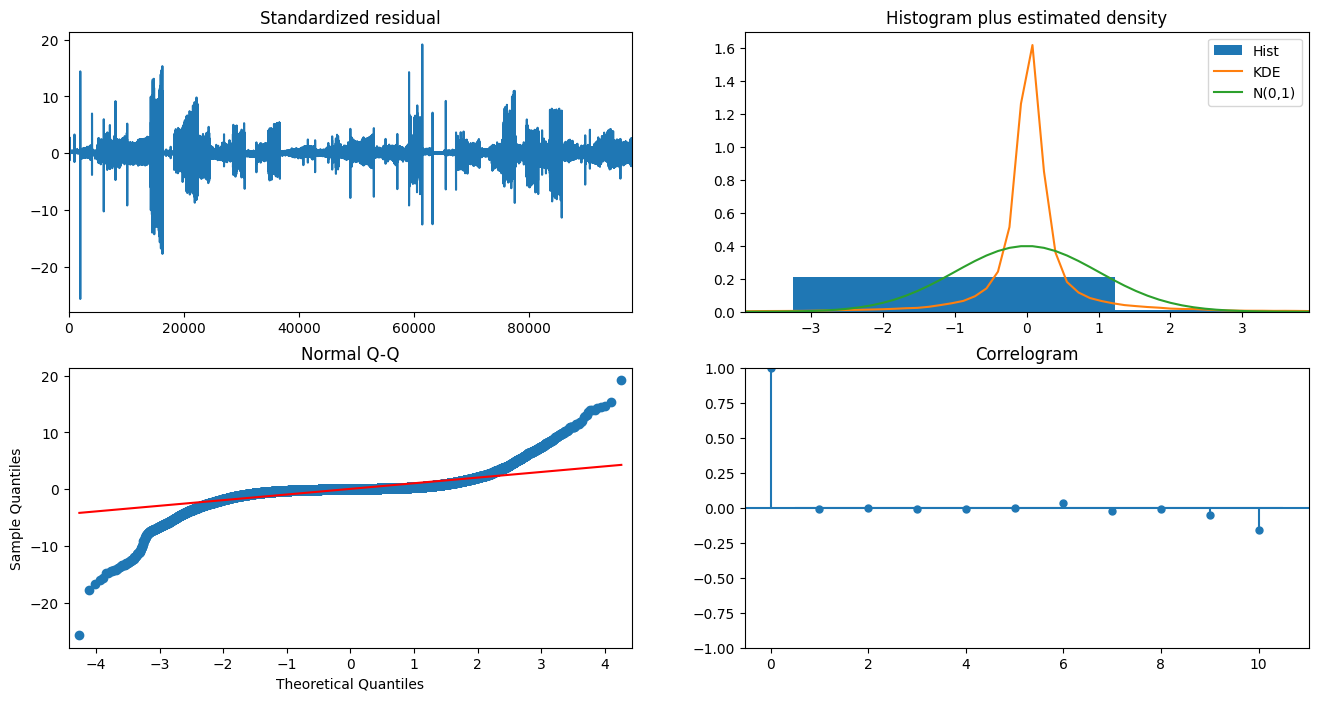

In [11]:
stepwise_model.plot_diagnostics(figsize=(16, 8))
plt.show()

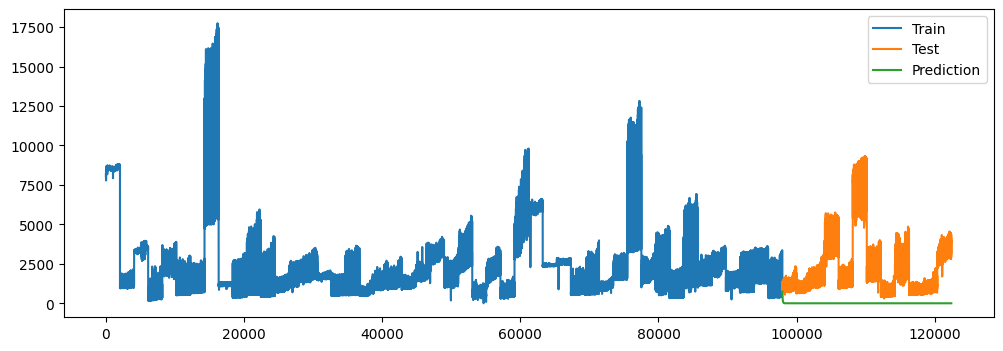

In [12]:
# 테스트 데이터 개수만큼 예측
y_predict = stepwise_model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

## AutoArima 실습

In [ ]:
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(그래프가 화면에 뜨지 않을 때)
%matplotlib inline

# 그래프(figure)에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정(나눔고딕체)
plt.rc('font', family='NanumGothic')

# 조용하 강사님이 올려주신 코드(한글화-matplotlib)
import koreanize_matplotlib

In [1]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train.csv',encoding='cp949')
test=pd.read_csv('test.csv',encoding='cp949')
submission=pd.read_csv('sample_submission.csv',encoding='cp949')

In [5]:
train=train[train['num']==1]['전력사용량(kWh)']
test=test[test['num']==1]
test['전력사용량(kWh)']=0
test=test['전력사용량(kWh)']

In [12]:
forecast

2040    8702.436337
2041    8698.536042
2042    8695.058331
2043    8691.851657
2044    8688.903809
           ...     
2203    8655.226584
2204    8655.226580
2205    8655.226576
2206    8655.226572
2207    8655.226569
Length: 168, dtype: float64

In [ ]:
# 그래프
    # 시간대 생성 (예: 0부터 데이터 포인트 수까지)
    time1 = np.arange(len(train_y))
    time2 = np.arange(len(train_y),len(train_y)+len(y_pred))
    
    # 실제 레이블과 예측값의 시각화를 위한 그래프
    plt.figure(figsize=(18, 6))
    plt.plot(time1, train_y, label="실제 레이블", color='blue')
    plt.plot(time2, y_pred, label="예측 레이블", color='red')

    plt.xlabel("시간")
    plt.ylabel("전력 사용량")
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(24,1,24)(0,0,0)[0] intercept   : AIC=inf, Time=66.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20333.755, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20308.725, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20313.311, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20331.863, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20294.519, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20280.719, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=20281.975, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20282.222, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20276.123, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20304.553, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20283.682, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20283.250, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20283.258, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0

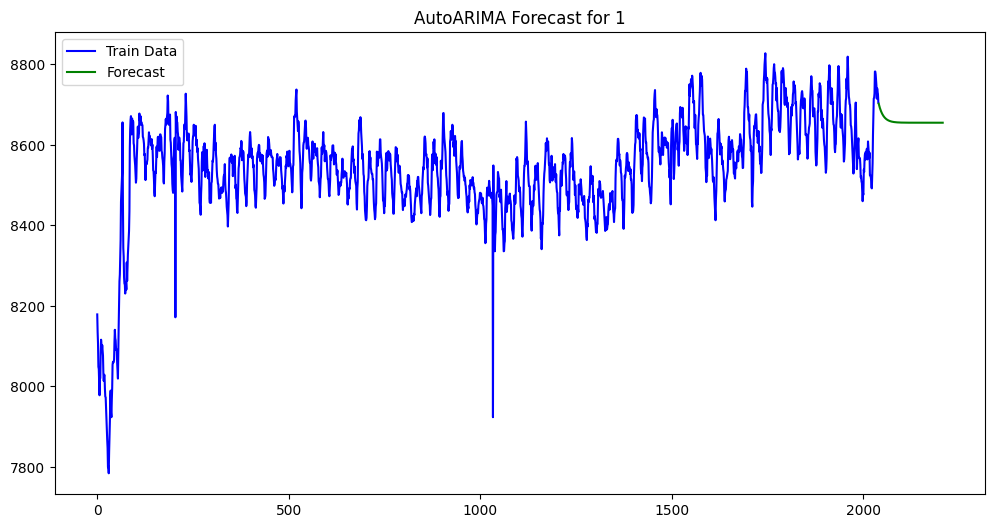

In [14]:
# AutoARIMA 모델 생성
model = auto_arima(train, start_p=24, start_q=24, max_p=168, max_q=168, seasonal=False, stepwise=False, trace=True)

# 모델 요약 정보 출력
print(model.summary())

# 예측
# 예측
n_forecast = len(test)
forecast, conf_int = model.predict(n_periods=n_forecast, return_conf_int=True)


# 예측 결과 출력
forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)

time1 = np.arange(len(train))
time2 = np.arange(len(train),len(train)+len(forecast))
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(time1,train, label='Train Data', color='blue')
plt.plot(time2,forecast, label='Forecast', color='green')
plt.title(f'AutoARIMA Forecast for 1')
plt.legend()
plt.show()
